In [14]:
from qiskit import *

In [15]:
def randomNibbleCircuit(circuit,qr,cr):
    for i in range(len(qr)):
        circuit.h(qr[i])
    circuit.measure(qr,cr)
    return circuit

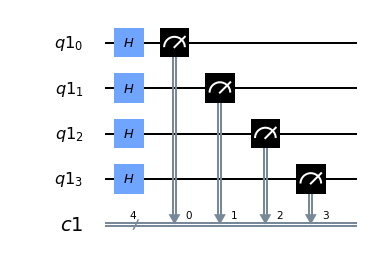

In [16]:
qr=QuantumRegister(4)
cr=ClassicalRegister(4)
circuit = QuantumCircuit(qr,cr)
circuit = randomByteCircuit(circuit,qr,cr)
circuit.draw(output='mpl')

In [31]:
simulator = Aer.get_backend('qasm_simulator') # From Qiskit's Aer package we select qasm (quantum assembly) simulator
key=""
for i in range(2**6):
    result = execute(circuit,backend=simulator).result() # Execute our circuit with backend as the qasm simulator and store the results
    result = result.data()
    result = result["counts"]
    randomNibble = min(result, key=result.get)
    key+= "{0:04b}".format(int(randomNibble, 16))
key = hex(int(key, 2))
print(key)

0x82720d3c64dd9fdb856312dbec349aeb4668cc7a10bd6abab783ea554ec30b6b
